Dataset Overview:
   Transaction_ID       Date     Product     Category  Quantity  Unit_Price  \
0            1000 2024-02-21       Phone  Accessories         4         526   
1            1001 2024-04-02      Laptop  Electronics         1          95   
2            1002 2024-01-15  Headphones  Accessories         1         422   
3            1003 2024-03-12  Headphones  Electronics         4         567   
4            1004 2024-03-01  Headphones  Electronics         3         148   

   Customer_ID Region  Total_Sales  
0         2059  North         2104  
1         2004  North           95  
2         2067   West          422  
3         2005  South         2268  
4         2095   East          444  

Summary Statistics:
       Transaction_ID                 Date    Quantity  Unit_Price  \
count      100.000000                  100  100.000000   100.00000   
mean      1049.500000  2024-02-20 12:57:36    2.680000   533.67000   
min       1000.000000  2024-01-02 00:00:00    1.000000

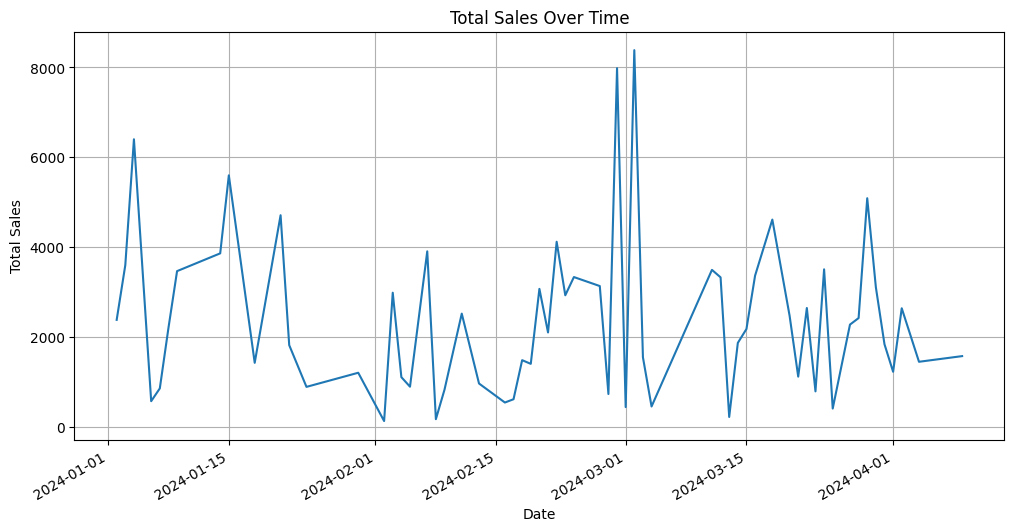

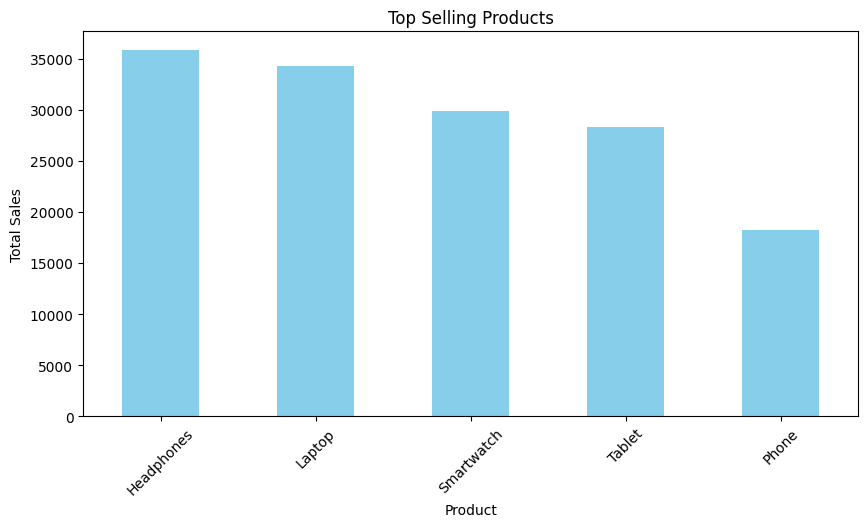

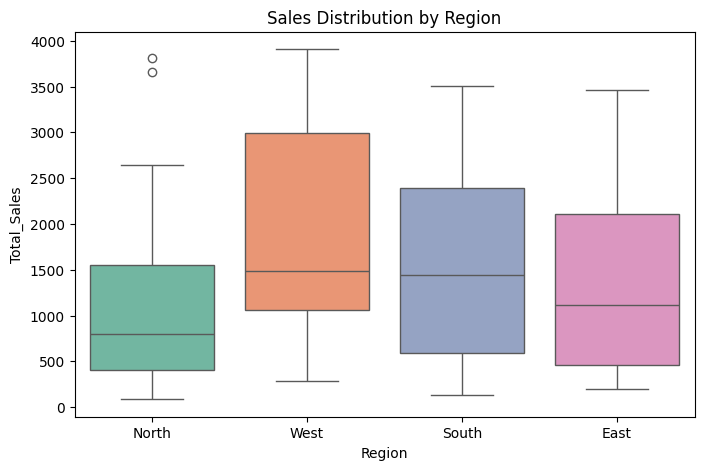

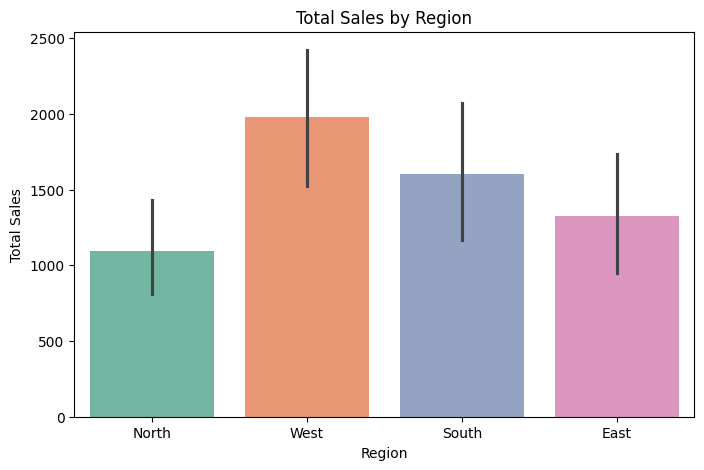

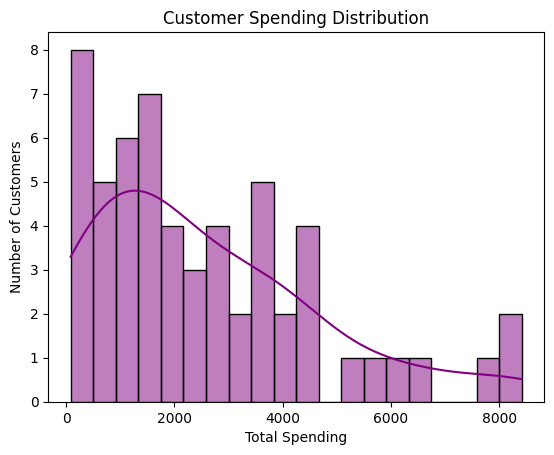

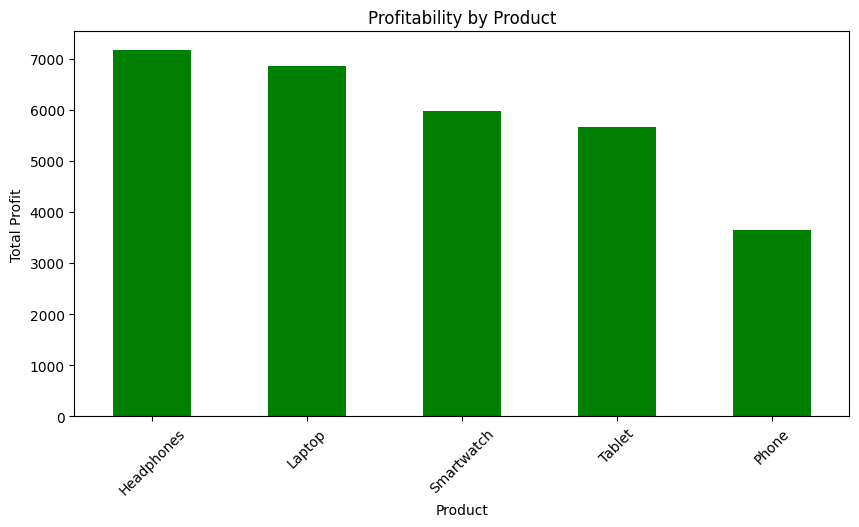

<Figure size 1200x600 with 0 Axes>

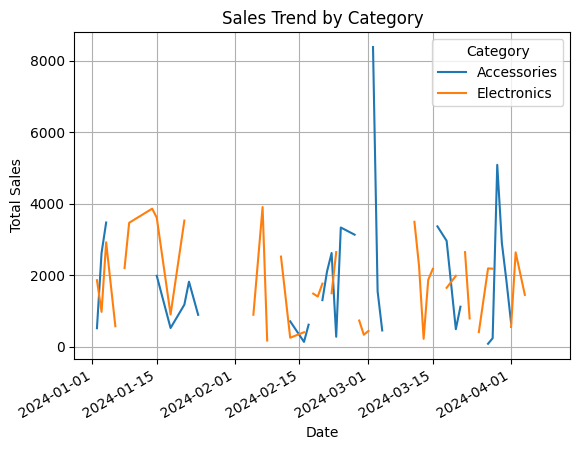

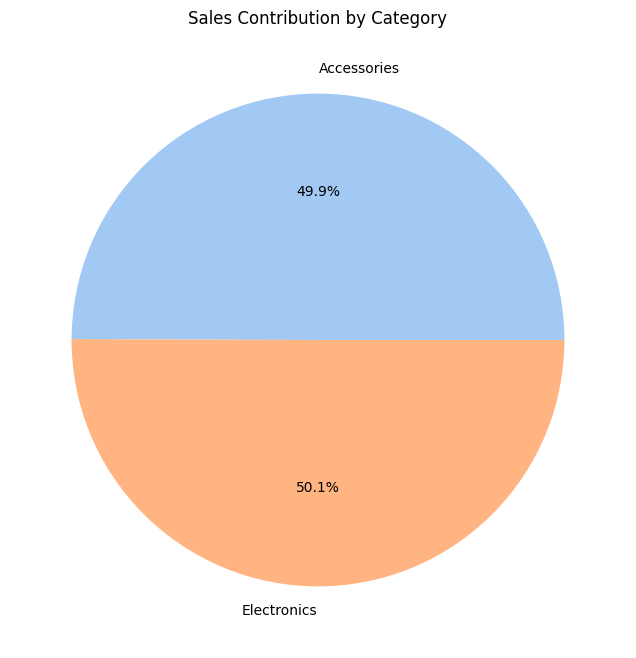

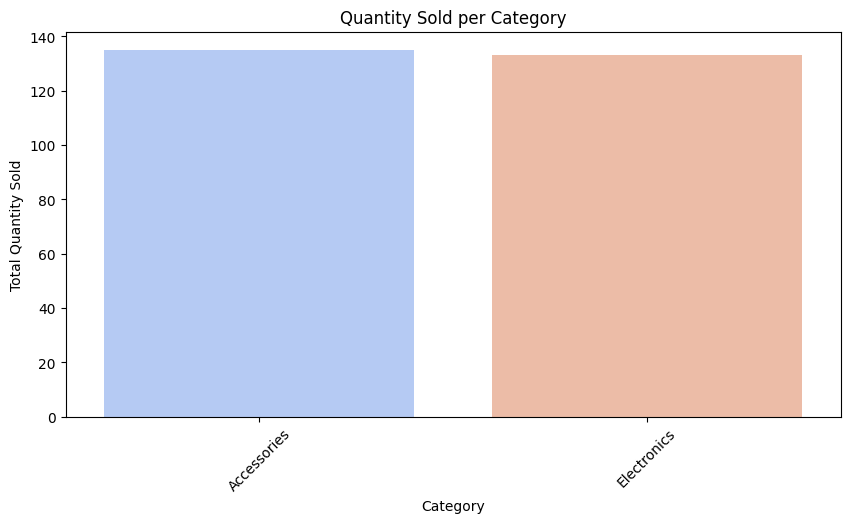

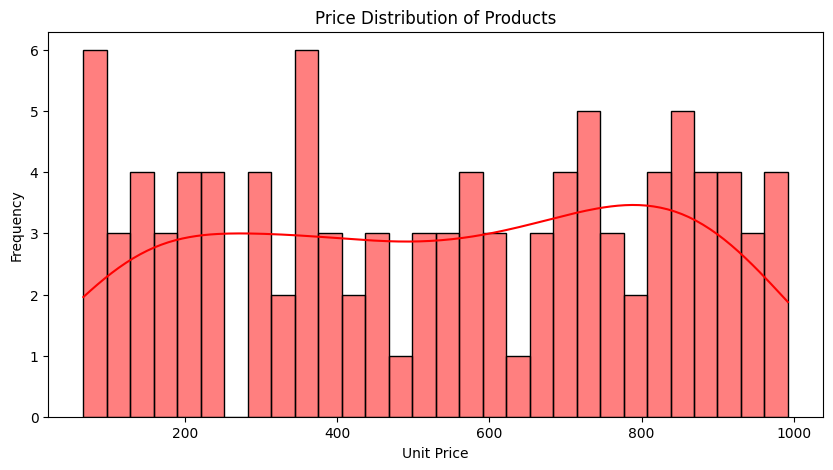

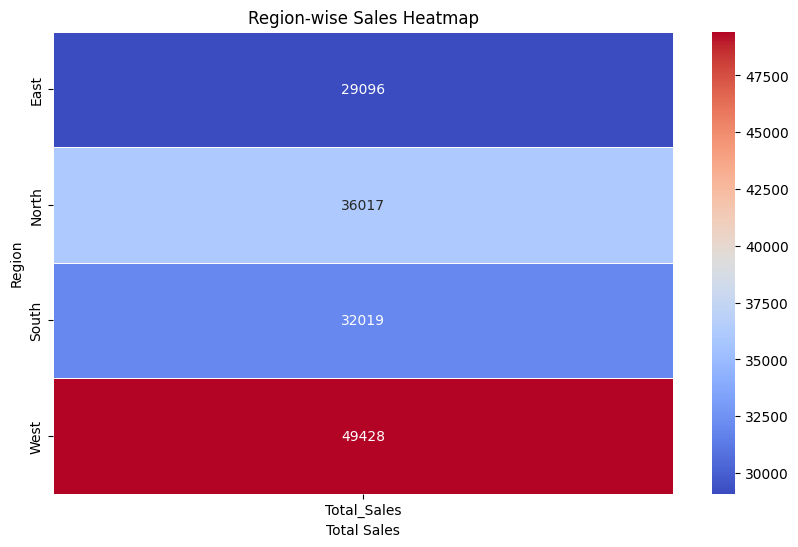

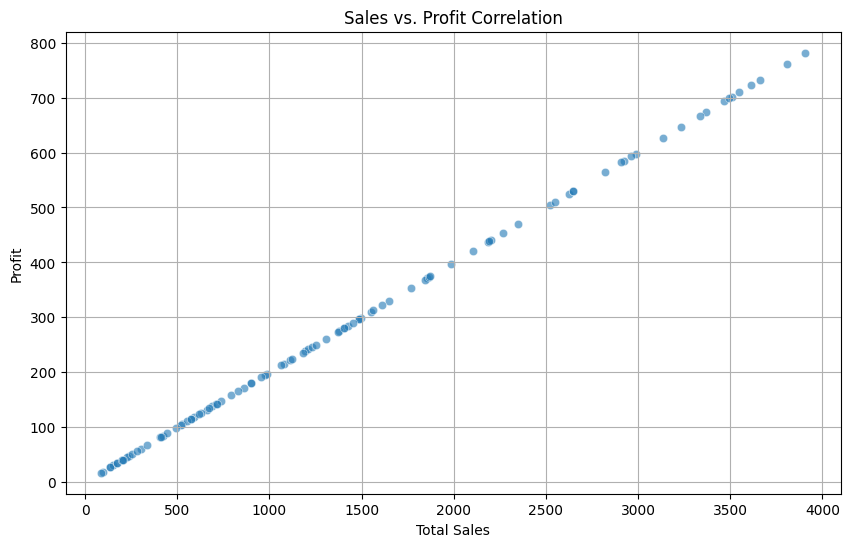

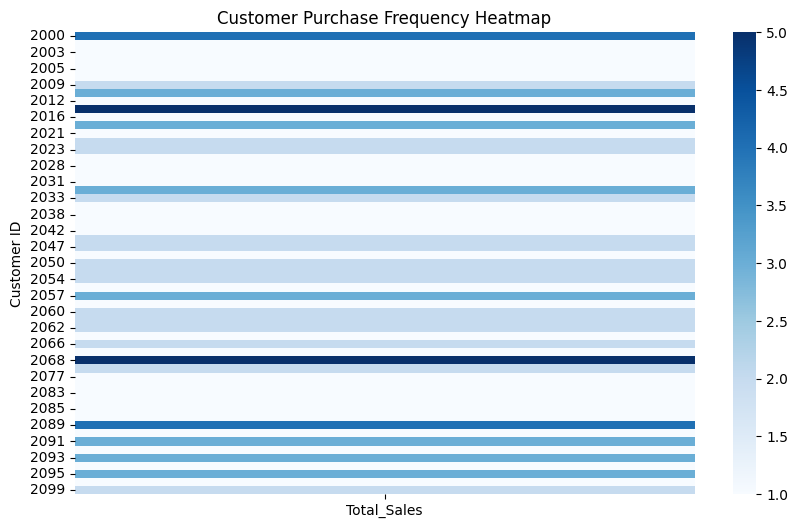

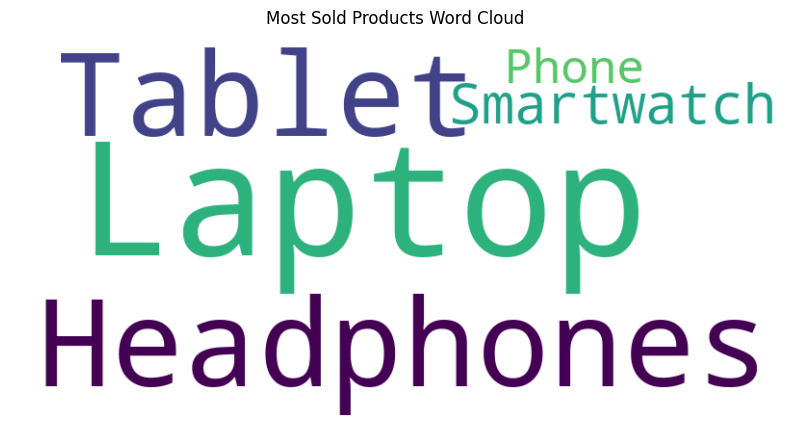

Analysis Completed.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Load the dataset
df = pd.read_csv("sales_data.csv")

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Basic dataset overview
print("Dataset Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

# Ensure column names are correct
df.columns = df.columns.str.strip()

# Total sales over time
plt.figure(figsize=(12, 6))
daily_sales = df.groupby("Date")["Total_Sales"].sum()
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Top-selling products
top_products = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Sales by region
plt.figure(figsize=(8, 5))
sns.boxplot(x="Region", y="Total_Sales", data=df, palette="Set2", hue="Region", legend=False)
plt.title("Sales Distribution by Region")
plt.show()

# Sales by region (Bar plot)
plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="Total_Sales", data=df, palette="Set2", hue="Region", legend=False)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# Customer segmentation (Total Spending per Customer)
customer_sales = df.groupby("Customer_ID")["Total_Sales"].sum()
sns.histplot(customer_sales, bins=20, kde=True, color="purple")
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

# Profitability analysis
df["Profit"] = df["Total_Sales"] * 0.2
plt.figure(figsize=(10, 5))
profit_by_product = df.groupby("Product")["Profit"].sum().sort_values(ascending=False)
profit_by_product.plot(kind="bar", color="green")
plt.title("Profitability by Product")
plt.xlabel("Product")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

# Sales Trend by Category
plt.figure(figsize=(12, 6))
category_sales_trend = df.groupby(["Date", "Category"])["Total_Sales"].sum().unstack()
category_sales_trend.plot()
plt.title("Sales Trend by Category")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(title="Category")
plt.grid()
plt.show()

# Sales Contribution by Category (Pie Chart)
plt.figure(figsize=(8, 8))
category_sales = df.groupby("Category")["Total_Sales"].sum()
category_sales.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Sales Contribution by Category")
plt.ylabel("")
plt.show()

# Quantity Sold per Category
plt.figure(figsize=(10, 5))
category_quantity = df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette="coolwarm", hue=category_quantity.index, legend=False)
plt.title("Quantity Sold per Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Unit_Price"], bins=30, kde=True, color="red")
plt.title("Price Distribution of Products")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

# Region-wise Sales Heatmap
plt.figure(figsize=(10, 6))
region_sales_matrix = df.pivot_table(index="Region", values="Total_Sales", aggfunc="sum")
sns.heatmap(region_sales_matrix, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Region-wise Sales Heatmap")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.show()

# Sales vs. Profit Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Total_Sales", y="Profit", alpha=0.6)
plt.title("Sales vs. Profit Correlation")
plt.xlabel("Total Sales")
plt.ylabel("Profit")
plt.grid()
plt.show()

# Customer Purchase Frequency Heatmap
customer_frequency = df.pivot_table(index="Customer_ID", values="Total_Sales", aggfunc="count")
plt.figure(figsize=(10, 6))
sns.heatmap(customer_frequency, cmap="Blues", annot=False)
plt.title("Customer Purchase Frequency Heatmap")
plt.ylabel("Customer ID")
plt.show()

# Word Cloud for Most Sold Products
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df["Product"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Sold Products Word Cloud")
plt.show()

print("Analysis Completed.")
